# Математическая модель shoe shine shop 

Система состоит из двух серверов, интенсивность обслуживания первого сервера – $\mu_1$, интенсивность обслуживания второго – $\mu_2$. 
Требования поступают в систему с интенсивностью $\lambda$

Каждое требование обслуживается по следующей логике: сначала требование обслуживается на сервере 1, затем, если сервер 2 свободен, требование обслуживается на нем. В противном же случае, если сервер 2 занят, требование «ждет», пока другое требование обслужится на сервере 2, причем сервер 1 в это время считается занятым, и другие требования поступать на него не могут.

Введем марковскую цепь на вероятностном пространстве $(\Omega, F, P(.))$.

1. Множество значений.

$X_i \in S$ $\forall  i$, где $S$ состоит из следующих состояний:

$(0, 0)$ - состояние, когда оба сервера никого не обслуживают 

$(1, 0)$ - состояние, когда первый сервер обслуживает требование, второй свободен 

$(0, 1)$ - состояние, когда первый сервер свободен, второй обслуживает

$(1, 1)$ - состояние, когда оба сервера обслуживают требования

$(b, 1)$ - состояние, когда второй сервер обслуживает, а первый закончил обслуживание. Однако первый "заблокирован" для поступления нового требования


2. Начальное распределение имеет следующий вид: 

$p = (1, 0, 0, 0, 0) $

или же 

$P(X_0 = (0,0)) = 1$

3. Составим матрицу переходов.

Вычислим все вероятности перехода, не равные 0. 

$P(X_i = (1,0) | X_{i-1} = (0,0)) = 1 $ - 

$P(X_i = (0,1) | X_{i-1} = (1,0)) = 1 $ - так как второй сервер свободен, после обслуживания на первом сервере требование сразу же переходит на обслуживание на втором сервере, освобождая первый

$P(X_i = (0,1) | X_{i-1} = (b,1)) = 1 $ - первое требование обслужилось и ждет, пока освободится второй сервер. Как только он освобождается, требование сразу начинает обслуживаться на втором сервера, освобождая первый 

$P(X_i = (1,1) | X_{i-1} = (0,1))$ - это вероятность того, что новое требование придет на первый сервер раньше, чем предыдущее требование обслужится на втором сервере. $(*)$

Обозначим случайную величину, обозначающую время между приходом двух требований за Z (~ exp($\lambda$)), а время обслуживания требования на втором сервере за Y (~ exp($\mu_2$)). Тогда, чтобый найти вероятность $(*)$, нужно вычислить следующую вероятность: 

$P(Z < Y) = \int_{0}^{+ \infty} P(Z < Y | Y = y) * \mu_2e^{-y\mu_2} \,dy = \int_{0}^{+ \infty} (1-e^{-y\lambda}) * \mu_2e^{-y\mu_2} \,dy =  \frac{\lambda}{\lambda + \mu_2}$

Таким образом, 

$P(X_i = (1,1) | X_{i-1} = (0,1)) = \frac{\lambda}{\lambda + \mu_2}$

и

$P(X_i = (0,0) | X_{i-1} = (0,1)) = 1 - \frac{\lambda}{\lambda + \mu_2} = \frac{\mu_2}{\lambda + \mu_2}$

$P(X_i = (b,1) | X_{i-1} = (1,1))$ - это вероятность того, что первый сервер закончит обслуживание требования до того, как закончит второй. $(**)$

Обозначим случайную величину, обозначающую время обслуживания на сервере 1 за Z (~ exp($\mu_1$)), а время обслуживания требования на втором сервере за Y (~ exp($\mu_2$)). Тогда чтобый найти вероятность $(**)$, нужно вычислить следующую вероятность: 

$P(Z < Y) = \int_{0}^{+ \infty} P(Z < Y | Y = y) * \mu_2e^{-y\mu_2} \,dy = \int_{0}^{+ \infty} (1-e^{-y\mu_1}) * \mu_2e^{-y\mu_2} \,dy =  \frac{\mu_1}{\mu_1 + \mu_2}$

Таким образом, 

$P(X_i = (b,1) | X_{i-1} = (1,1)) = \frac{\mu_1}{\mu_1 + \mu_2}$

и

$P(X_i = (1,0) | X_{i-1} = (1,1)) = 1 - \frac{\mu_1}{\mu_1 + \mu_2} = \frac{\mu_2}{\mu_1 + \mu_2}$

Теперь можем составить матрицу переходных вероятностей:

$
\mathbb{P} = 
\begin{pmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
\frac{\mu_2}{\lambda + \mu_2} & 0 & 0 & \frac{\lambda}{\lambda + \mu_2} & 0\\ 
0 & 0 & \frac{\mu_2}{\mu_1 + \mu_2} & 0 & \frac{\mu_1}{\mu_1 + \mu_2} \\ 
0 & 1 & 0 & 0 & 0 \\
\end{pmatrix}
$

# Описание программы, код программы и подпрограмм

<img src="ill2.PNG">

true - 0,489. 5 - 0,33. 10 - 0,357. 30 - 0,4188. 50 - 0,426. 70 - 0,459. 80 - 0,439. 11 - 0,51. 150 - 0,477

In [18]:
import threading
import time
import random
import speedx_accurasy as sa

#import numpy as np

C_SIZE = 170
served = False
checked = False
uptime = False

# settings
speed_x = 0
print_steps = 0
time_in_Q = 0
zero_ppl_s = 0
zero_ppl_e = 0

mean_time_sys=0

logger_list = []

message = ""
if speed_x:
    message = "hello"


class Client:
    id = None
    entrance_time_first = None
    entrance_time_second = None
    exit_time = None
    time_on_the_first_chair = None
    time_on_the_second_chair = None
    time_in_queue = 0

    def __init__(self, _id, _entrance_time):
        self.id = _id
        self.entrance_time_first = _entrance_time

    def give_info(self):
        return [self.id, self.entrance_time_first, self.time_on_the_first_chair,
                self.time_in_queue, self.entrance_time_second,
                self.time_on_the_second_chair, self.exit_time]


cur_clients = {
    'first chair': Client,
    'second chair': Client
}


def serving(client, chair1, chair2):
    global time_in_Q
    global mean_time_sys
    chair1.serving1(client)

    start = time.time()
    e.wait()
    end = time.time()
    client.time_in_queue = end - start
    e.clear()
    if print_steps:
        print("client - {}, time in queue {}".format(client.id, client.time_in_queue))
    chair1.is_busy = False
    chair2.serving2(client)
    # client.exit_time = client.entrance_time_second + client.time_on_the_second_chair
    logger_list.append(client)
    time_in_Q += client.time_in_queue
    mean_time_sys+=client.exit_time-client.entrance_time_first
    e.set()
    return


class Chair:
    entrance_time = None
    exit_time = None
    is_busy = False

    def __init__(self):
        pass

    def serving1(self, client):
        random.seed()
        _ksi1 = random.expovariate(nu1)
        self.is_busy = True
        if print_steps:
            print('start serving client', client.id, 'on first', " in ", client.entrance_time_first, "\n")
        time.sleep(_ksi1)
        client.time_on_the_first_chair = _ksi1
        if print_steps:
            print("client {} is served on first, total time - {}".format(client.id, client.time_on_the_first_chair))
        # self.is_busy = False
        return

    def serving2(self, client):
        random.seed()
        _ksi2 = random.expovariate(nu2)
        self.is_busy = True
        client.entrance_time_second = client.entrance_time_first + client.time_on_the_first_chair + client.time_in_queue
        if print_steps:
            print('start serving client', client.id, ' on second', " in ", client.entrance_time_second)
        time.sleep(_ksi2)
        client.time_on_the_second_chair = _ksi2
        if print_steps:
            print("client {} is served on second, total time - {}".format(client.id, client.time_on_the_second_chair))
        client.exit_time = client.entrance_time_second + client.time_on_the_second_chair
        self.is_busy = False
        return


chair1 = Chair()
chair2 = Chair()

Added = False

clients = []
timer = 0
gl_id = 0
e = threading.Event()

### init vars

lmb = 1 / 2

# _lambda = np.random.poisson(lmb) / speed_x
# _ksi1 = random.expovariate(lmb) / speed_x
# _ksi2 = random.expovariate(lmb) / speed_x

lm = 0.25
nu1 = 1
nu2 = 1

_lambda = 1
_ksi1 = 1
_ksi2 = 1

print('интенсивность поступления заявок - {}, интенсивность обслуживания(1 стул) - {},'
      ' интенсивность обслуживания(2 стул) - {}'.format(_lambda, _ksi1 ,
                                                        _ksi2 ))

num_of_rejected = 0
num_of_served = 0

program_start = time.time()
time_lambda = time.time()
persentage = 10
print("|       |")

for c in range(C_SIZE):
    random.seed()
    if c * 100 // C_SIZE >= persentage:
        print("#", sep='', end='')
        persentage += 10

    if c != 0:
        _lambda = random.expovariate(lm)
        time.sleep(_lambda)  # waiting for client
        time_lambda = time.time()
    else:
        e.set()

    if print_steps:
        print("got new client! cur time = ", time_lambda - program_start)

    if chair1.is_busy:
        num_of_rejected += 1
        if print_steps:
            print("client rejected chair is busy")
    else:
        num_of_served += 1
        gl_id += 1
        time_start = time.time()
        x = threading.Thread(target=serving, args=(Client(gl_id, time_start - program_start), chair1, chair2,))
        x.start()

x.join()
program_end = time.time()
print("QQQQQQ TIME = ", time_in_Q / (program_end - program_start))
print("ZERO TIME = ", zero_ppl_s / (program_end - program_start))
print()
print("всего клиентов - {}, отклонено - {}, обслужено - {}".format(num_of_served + num_of_rejected,
                                                                   num_of_rejected, num_of_served))

if print_steps:
    print(
        "id| entrance_time_first | time_on_the_first_chair |  time_in_queue | "
        "entrance_time_second | time_on_the_second_chair | exit_time")
if print_steps:
    for k in logger_list:
        print(k.give_info())

mean_time_in_system = 0
P_denial = 0
P_wait = 0
mean_wait_time = 0
first_chair_entrances = []
second_chair_entrances = []

for k in logger_list:
    mean_time_in_system += _ksi1 + _ksi2 + k.give_info()[3]
    if k.give_info()[3] != 0:
        P_wait += 1
    mean_wait_time += k.give_info()[3]
    first_chair_entrances.append(k.give_info()[1])
    second_chair_entrances.append(k.give_info()[4])

sset1 = []
sset2 = []
for item in first_chair_entrances:
    sset1.append(tuple((item, item + _ksi1)))

for item in second_chair_entrances:
    sset2.append(tuple((item, item + _ksi2)))

system_work_time = logger_list[-1].give_info()[-1]
matrix = sa.get_segment_intersection(sset1, sset2, system_work_time)
t_b_1 = mean_wait_time / system_work_time
matrix[0][1] -= t_b_1
mean_time_in_system /= num_of_served
P_denial = len(logger_list) * _ksi1 / system_work_time
P_wait /= num_of_served
mean_wait_time /= num_of_served
P_no_clients_second_chair = len(logger_list) * _ksi2 / system_work_time
mean_time_sys/=num_of_served

print()
print("Среднее время в системе (1 стул - очередь - 2 стул)  ", mean_time_sys)
print("Занятость 1 стула                                    ", P_denial)
print("Отказов                                              ", num_of_rejected / (num_of_rejected + num_of_served))
print("Ожидающих клиентов                                   ", P_wait)
print("Среднее время ожидания                               ", mean_wait_time )
print("Нет клиентов на 1 стуле                              ", (1 - P_denial))
print("Нет клиентов на 2 стуле                              ", P_no_clients_second_chair)
print("-----------------------------------------------------------")
print("(0, 0)                                               ", matrix[0][0])
print("(0, 1)                                               ", matrix[0][1])
print("(1, 0)                                               ", matrix[1][0])
print("(1, 1)                                               ", matrix[1][1])
print("(b, 1)                                               ", t_b_1)
print("-----------------------------------------------------------")
print("Проверка суммой (==1): ", matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1] + t_b_1)
print("speedX: ", speed_x, "\nMean min speedX error: ", 100 - int(sa.get_expected_accurasy(speed_x) * 10000) / 100, "%")


интенсивность поступления заявок - 1, интенсивность обслуживания(1 стул) - 1, интенсивность обслуживания(2 стул) - 1
|       |
#########QQQQQQ TIME =  0.025537765477283793
ZERO TIME =  0.0

всего клиентов - 70, отклонено - 10, обслужено - 60

Среднее время в системе (1 стул - очередь - 2 стул)   1.9892489336925983
Занятость 1 стула                                     0.21709924337518832
Отказов                                               0.14285714285714285
Ожидающих клиентов                                    0.13333333333333333
Среднее время ожидания                                0.11764209667841594
Нет клиентов на 1 стуле                               0.7829007566248116
Нет клиентов на 2 стуле                               0.21709924337518832
-----------------------------------------------------------
(0, 0)                                                0.6589270982588685
(0, 1)                                                0.10813489176580213
(1, 0)                            

In [17]:
import math


def get_expected_accurasy(speed_x):
    if speed_x >= 15625:
        return "as horrible as possible"
    acc = [0.8568, 0.8556, 0.844, 0.8, 0.54, 0.13, 0.03]
    bords = [1, 5, 25, 125, 625, 3125, 15625]
    n = acc[0]
    for i in range(len(acc)):
        acc[i] /= n
    id = 1
    while speed_x >= bords[id]:
        id += 1
    p = (speed_x - bords[id - 1]) / (bords[id] - bords[id - 1])
    return acc[id] * p + (1 - p) * acc[id - 1]


def get_segment_intersection(sset1, sset2, systime, accurasy=0.001):
    if accurasy > (sset1[0][1] - sset1[0][0]):
        raise ValueError("accurasy outstrip the distance")
    l1 = len(sset1)
    l2 = len(sset2)
    matrix = [[0, 0], [0, 0]]
    idf = 0
    ids = 0
    m1 = 0
    m2 = 0

    i = 0
    num = 0
    while i < systime:
        num += 1

        if idf < l1:
            if i > sset1[idf][1]:
                idf += 1
                m1 = 0
            if idf < l1:
                if i < sset1[idf][0]:
                    m1 = 0
                else:
                    m1 = 1

        if ids < l2:
            if i > sset2[ids][1]:
                ids += 1
                m2 = 0
            if ids < l2:
                if i < sset2[ids][0]:
                    m2 = 0
                else:
                    m2 = 1

        matrix[m1][m2] += 1

        i += accurasy

    for j in range(2):
        matrix[j][0] /= num
        matrix[j][1] /= num

    return matrix

Пример вывода статистик программой:
<img src="expmpl.PNG">
<img src="exp2.PNG">

# Проверка корректности результатов программы

Сейчас попробуем определить, корректны ли полученные характеристики в ходе проведения эксперимента.


Для начала стоит отметить, что в данной модели не хватит лишь количества человек в системе для каждого состояния.<br>
Поскольку у нас 2 обрабатывающих сервера, то состояния нужно учитывать для обоих. Это возможные 5 состояний системы:<br>
<ol>
  <li>(0,0) - оба сервера ничего не обратбатывают</li>
  <li>(1,0) - первый сервер обрабатывает запрос, второй ожидает</li>
  <li>(0,1) - второй сервер обрабатывает запрос, первый ожидает</li>
  <li>(1,1) - оба сервера обрабатывают запросы</li>
  <li>(b,1) - первый сервер уже обработал и не может отправить запрос второму, пока тот обрабатывает другой запрос</li>
</ol>

Исходя из того, что интенсивность прихода равна $\lambda$, и интенсивность обработки запросов на первом и втором серверах соответственно $\mu_1$ и $\mu_2$, то получается следующая Марковская цепь состояний нашей модели : 
<img src="mark_chain.PNG">

Следовательно, теперь можем расписать входной и выходной поток для каждого состояния : 
<ul>
  <li>(0,0) :  $\lambda * \pi_{00} = \mu_2 * \pi_{01}$</li>
  <li>(1,0) :  $\mu_1 * \pi_{10} = \lambda * \pi_{00} + \mu_2 * \pi_{11}$</li>
  <li>(0,1) :  $(\mu_2 + \lambda) * \pi_{01} = \mu_1 * \pi_{10} + \mu_2 * \pi_{b1}$</li>
  <li>(1,1) :  $(\mu_1 + \mu_2) * \pi_{11} = \lambda * \pi_{01}$</li>
  <li>(b,1) :  $\mu_1 * \pi_{11} = \mu_2 * \pi_{b1}$</li>
</ul>
<br><br>
Выполняя линейные преобразования с системой, получаем следующие значения:<br>
\begin{equation}\
\pi_{00} * (1, \frac{\lambda}{\mu_1} + \frac{\lambda^2}{(\mu_1 + \mu_2) * \mu_1}, \frac{\lambda}{\mu_2}, \frac{\lambda^2}{(\mu_1 + \mu_2) * \mu_2}, \frac{\mu_1 * \lambda^2}{\mu_2^2 * (\mu_1 + \mu_2)})
\end{equation}

<br><br>
Теперь можем сделать подстановку значений, использованных в экспериментах и найти стационарное распределение:

### Эксперимент 1
При $\lambda = 0,5$, $\mu_1 = 0,9$ и $\mu_2 = 0,2$ получаем следующие значения стационарного распределения (теоритические): <br>

\begin{equation}\ \pi_{00}  \approx 0.094; \end{equation}
\begin{equation}\ \pi_{10}  \approx 0.076; \end{equation}
\begin{equation}\ \pi_{01}  \approx 0.236; \end{equation}
\begin{equation}\ \pi_{11}  \approx 0.107; \end{equation}
\begin{equation}\ \pi_{b1}  \approx 0.484; \end{equation}

При этом написанная программа, реализующая работу мат. модели Shoe Shine Shop, выдает следующие результаты:
#### Вывод : 
Данное стационарное распределение получилось логичным, поскольку первый сервер обрабатывает запросы в 4,5 раза быстрее второго, поэтому наиболее вероятными в таком случае будут состояния , когда на запрос на первом сервере обработан, а на втором сервере еще обрабатывается другой запрос. <br>
И второе состояние, когда первый сервер пустует, а второй обрабатывает.

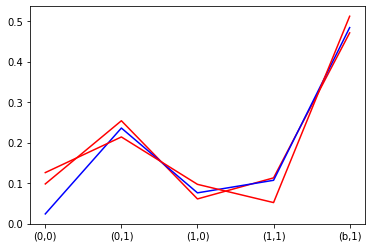

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
res_arr = [[0.098, 0.254, 0.061, 0.113, 0.471], [0.024, 0.236, 0.076, 0.107, 0.484],
          [0.126, 0.214, 0.097, 0.052,  0.512]]
names = ["test_1", "test_2", "therory"]
cols = ["(0,0)", "(0,1)", "(1,0)", "(1,1)", "(b,1)"]
results = pd.DataFrame(data=res_arr, columns=cols)
results["name"] = names

plt.plot(cols[:5], (results.loc[0])[:5], 'r')
plt.plot(cols[:5], (results.loc[1])[:5], 'b')
plt.plot(cols[:5], (results.loc[2])[:5], 'r')

### Эксперимент 2

При $\lambda = 0,25$, $\mu_1 = 1$ и $\mu_2 = 1$ получаем следующие значения стационарного распределения (теоритические): <br>

\begin{equation}\ \pi_{00}  \approx 0,627; \end{equation}
\begin{equation}\ \pi_{10}  \approx 0,176; \end{equation}
\begin{equation}\ \pi_{01}  \approx 0,156; \end{equation}
\begin{equation}\ \pi_{11}  \approx 0,019; \end{equation}
\begin{equation}\ \pi_{b1}  \approx 0,019; \end{equation}


При этом написанная программа, реализующая работу мат. модели Shoe Shine Shop, выдает следующие результаты:



#### Вывод :
Здесь же видно, что серверы обрабатывают запросы гораздо быстрее, чем они поступают, поэтому чаще всего в данной системе оба сервера будут ожидать, о чем и говорит стационарное распределение.

In [9]:
res_arr = [[0.656, 0.187, 0.112, 0.012, 0.030], [0.630, 0.219, 0.068, 0.073, 0.008],
          [0.585,  0.119, 0.151, 0.121, 0.022], [ 0.676, 0.108, 0.117, 0.084, 0.013], [0.627, 0.176, 0.156, 0.019, 0.019]]
names = ["test_1", "test_2", "test_3", "test_4", "therory"]
cols = ["(0,0)", "(0,1)", "(1,0)", "(1,1)", "(b,1)"]
results = pd.DataFrame(data=res_arr, columns=cols)
results["name"] = names

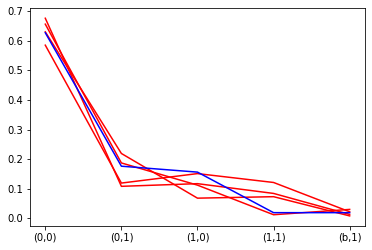

In [10]:
plt.plot(cols[:5], (results.loc[0])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[1])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[2])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[3])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[4])[:5], 'b', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.legend(loc='best')
plt.show()

### Эксперимент 3

При $\lambda = 1$, $\mu_1 = 2$ и $\mu_2 = 2$ получаем следующие значения стационарного распределения (теоритические): <br>

\begin{equation}\ \pi_{00}  \approx 0,421; \end{equation}
\begin{equation}\ \pi_{10}  \approx 0,263; \end{equation}
\begin{equation}\ \pi_{01}  \approx 0,210; \end{equation}
\begin{equation}\ \pi_{11}  \approx 0,052; \end{equation}
\begin{equation}\ \pi_{b1}  \approx 0,0526; \end{equation}


При этом написанная программа, реализующая работу мат. модели Shoe Shine Shop, выдает следующие результаты:



#### Вывод :


In [27]:
res_arr = [[ 0.5210906793935991,  0.22831274564851206,   0.13653378251918397, 0.07886534818283514,  0.03519744425586971],
           [  0.45249960783367321,  0.22951986774944794,   0.15062806945567314,  0.08510323258131372,  0.08224922237989199],
           [ 0.5210906793935991,  0.22831274564851206,   0.13653378251918397, 0.07886534818283514,  0.03519744425586971],
           [ 0.4210906793935991,  0.211344579506,   0.23653749097, 0.088354,  0.03114457643971],
           [0.421, 0.263, 0.210, 0.052, 0.052]]
names = ["test_1", "test_2", "test_3", "test_4", "therory"]
cols = ["(0,0)", "(0,1)", "(1,0)", "(1,1)", "(b,1)"]
results = pd.DataFrame(data=res_arr, columns=cols)
results["name"] = names


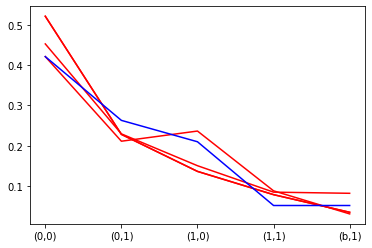

In [28]:
plt.plot(cols[:5], (results.loc[0])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[1])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[2])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[3])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[4])[:5], 'b', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.legend(loc='best')
plt.show()

### Эксперимент 4

При $\lambda = 2$, $\mu_1 = 2$ и $\mu_2 = 2$ получаем следующие значения стационарного распределения (теоритические): <br>

\begin{equation}\ \pi_{00}  \approx 0,245; \end{equation}
\begin{equation}\ \pi_{10}  \approx 0,35; \end{equation}
\begin{equation}\ \pi_{01}  \approx 0,245; \end{equation}
\begin{equation}\ \pi_{11}  \approx 0,165; \end{equation}
\begin{equation}\ \pi_{b1}  \approx 0,0183; \end{equation}


При этом написанная программа, реализующая работу мат. модели Shoe Shine Shop, выдает следующие результаты:



#### Вывод :
В данном случае было интересно проверить, как будет выглядить стационарное распределение в случае, когда, кажется, что система должна выполнятся четко и последовательно. На практике не получилось увидеть эти результаты так явно. Из-за диспресии относительно часто потоки задерживались, продолжая работать вместе.

In [43]:
res_arr = [[0.3040, 0.287, 0.2401, 0.18, 0.031], 
           [0.264, 0.347, 0.2291, 0.15, 0.04895],
          [0.2540, 0.297, 0.2301, 0.12, 0.0801], 
         [0.2740, 0.360, 0.2401, 0.140, 0.071], 
           [0.245, 0.35, 0.245, 0.117, 0.063]]
names = ["test_1", "test_2", "test_3", "test_4", "therory"]
cols = ["(0,0)", "(0,1)", "(1,0)", "(1,1)", "(b,1)"]
results = pd.DataFrame(data=res_arr, columns=cols)
results["name"] = names

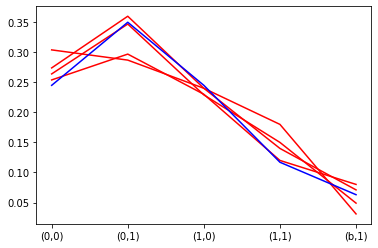

In [44]:
plt.plot(cols[:5], (results.loc[0])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[1])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[2])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[3])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[4])[:5], 'b', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.legend(loc='best')
plt.show()

## Other metrics

Рассмотрим такую величину, как среднее число запросов в системе. Один запрос находится в системе, когда она в состоянии (0,1) или (1,0). Два запроса одновременно могут находиться в следующих состояниях : (1,1) и (b,1). Значит среднее число людей в системе определяется по формуле :<br>
\begin{equation}\ L = \pi_{01} + \pi_{10} + 2 * (\pi_{11} + \pi_{b1})   \end{equation}

Так же стоит отметить, что потенциальный запрос может войти в систему только тогда, когда она находится в состояниях (0,0) или (0,1), при этом с интенсивностью $\lambda$. Тогда среднее время обработки запроса в системе будет вычисляться по формуле : <br>
\begin{equation}\ w = \frac {\pi_{01} + \pi_{10} + 2 * (\pi_{11} + \pi_{b1})}{\lambda * (\pi_{00} + \pi_{01})}  \end{equation}

<br>

<b>Эксперимент 1</b>
Среднее время обслуживания запроса по теории : 7,47
<br>Средние значения, полученные на практике : 8,023

<b>Эксперимент 2</b>
Среднее время обслуживания запроса по теории : 1,89
<br>Значения, полученные на практике : 1,96

<b>Эксперимент 3</b>
Среднее время обслуживания запроса по теории : 1,0833
<br>Значения, полученные на практике : 1,063

<b>Эксперимент 4</b>
Среднее время обслуживания запроса по теории : 0,92
<br>Значения, полученные на практике : 1.1361